[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1201723 to 610523
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   headline    10000 non-null  object
 2   url         10000 non-null  object
 3   publisher   10000 non-null  object
 4   date        10000 non-null  object
 5   stock       10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 546.9+ KB
None

First 5 rows:
         Unnamed: 0                                           headline  \
1201723     1207519  Syntel, Inc. Reports Q1 EPS of $1.11 vs $1.03 ...   
1282616     1288780  Mid-Day Market Update: K2M Group Rises On Acqu...   
554075       557018  Aramchol's Failed Past Isn't Its Future; Galme...   
1190332     1196088     60 Stocks Moving In Thursday's Mid-Day Session   
192958       194114  Anheuser-Busch shares are trading lower after ...   

                                       

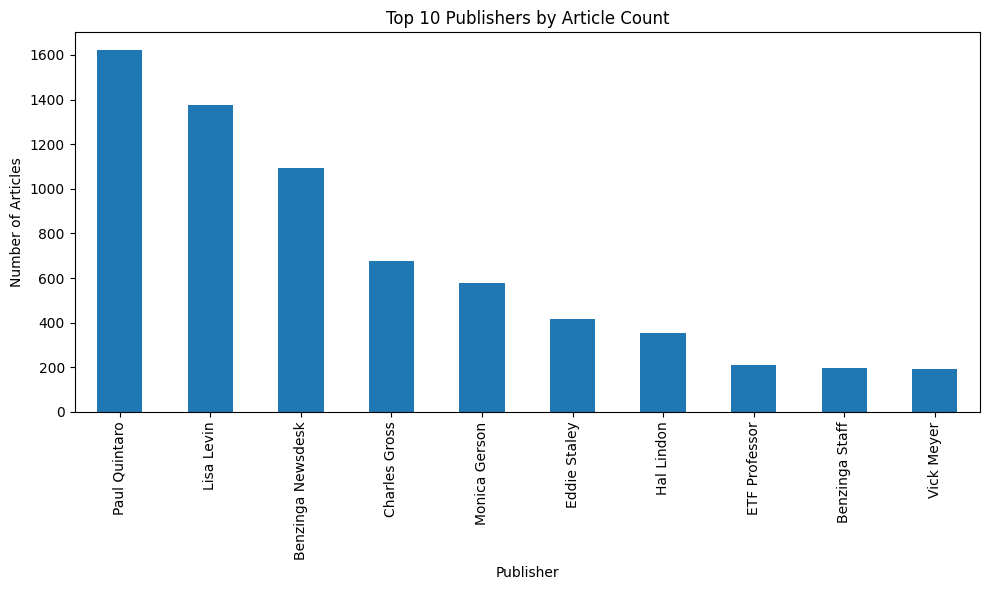

Saved publication_trends.png


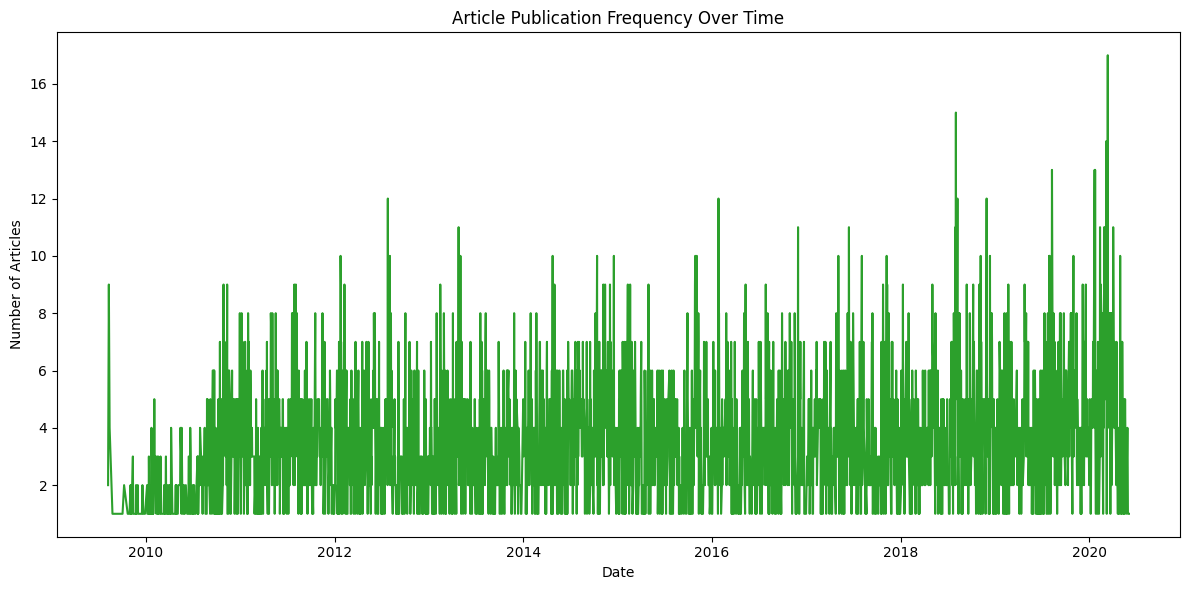

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

# Set absolute path for notebooks directory
notebook_dir = os.path.join(os.getcwd(), 'notebooks')
os.makedirs(notebook_dir, exist_ok=True)  # Ensure directory exists

# Load FNSPID dataset (sample 10,000 rows to speed up)
try:
    df_news = pd.read_csv('../data/raw_analyst_ratings.csv')  # Adjust path if needed
    df_news = df_news.sample(n=10000, random_state=42) if len(df_news) > 10000 else df_news  # Sample if large
    print("Dataset Info:")
    print(df_news.info())
    print("\nFirst 5 rows:")
    print(df_news.head())
except FileNotFoundError:
    print("Error: fnspid.csv not found. Please check the file path.")

# 1. Descriptive Statistics (Headline Length)
df_news['headline_length'] = df_news['headline'].apply(lambda x: len(str(x).split()))  # Faster than word_tokenize
print("\nHeadline Length Statistics:")
print(df_news['headline_length'].describe())

# 2. Publisher Analysis
publisher_counts = df_news['publisher'].value_counts()
print("\nTop 10 Publishers:")
print(publisher_counts.head(10))

# Visualization: Top 10 publishers
plt.figure(figsize=(10, 6))
publisher_counts.head(10).plot(kind='bar', color='#1f77b4')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.tight_layout()
try:
    plt.savefig(os.path.join(notebook_dir, 'publisher_counts.png'))
    print("Saved publisher_counts.png")
except Exception as e:
    print(f"Error saving publisher_counts.png: {e}")
plt.show()

# 3. Publication Date Trends
df_news['date'] = pd.to_datetime(df_news['date'], utc=True, errors='coerce')
df_news['date_only'] = df_news['date'].dt.date
daily_counts = df_news.groupby('date_only').size()

# Visualization: Publication frequency
plt.figure(figsize=(12, 6))
daily_counts.plot(color='#2ca02c')
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
try:
    plt.savefig(os.path.join(notebook_dir, 'publication_trends.png'))
    print("Saved publication_trends.png")
except Exception as e:
    print(f"Error saving publication_trends.png: {e}")
plt.show()